In [1]:
#Playing around with data visualizations to compare boro and total traffic

In [2]:

#imports (use pip install 'package')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import geocoder
import folium
from haversine import haversine
% matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import datetime

In [15]:
#Load the csv file for green taxis August 2013 into a pandas dataframe
green = pd.read_csv('Cleaned_Green_Count.csv')
df_green = pd.DataFrame(green)

#Load the cleaned csv file for NYC 2012-2013 traffic into a pandas datafram
traffic = 'Cleaned_Traffic_Count_coordinates.csv'
df_traffic = pd.read_csv(traffic)

In [50]:
#get coordinates of pickup and dropoff of both boro taxis and general traffic

#Boro pickup
greenLongPick = df_green['Pickup_longitude'].values
greenLatPick = df_green['Pickup_latitude'].values
#Boro dropoff
greenLongDrop = df_green['Dropoff_longitude'].values
greenLatDrop = df_green['Dropoff_latitude'].values

#Total pickup
trafficLongPick = df_traffic['From Lon'].values
trafficLatPick = df_traffic['From Lat'].values
#Total dropoff
trafficLongDrop = df_traffic['To Lon'].values
trafficLatDrop = df_traffic['To Lat'].values



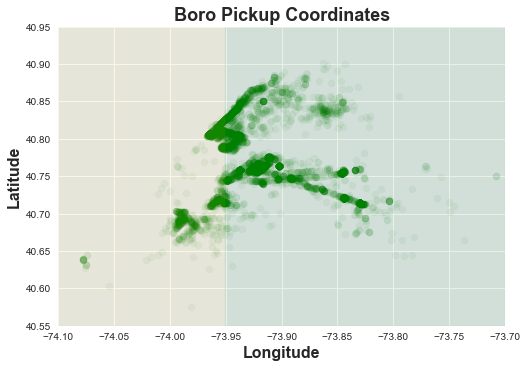

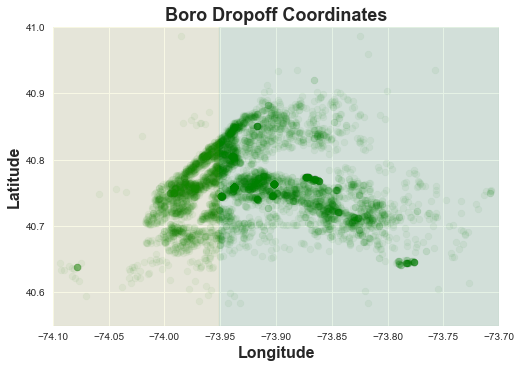

In [125]:
#Plot Boro Pickup and Dropoff

# Plot Boro pickup
plt.scatter(greenLongPick, greenLatPick,label = 'Intended Boro Service', c='green',alpha=0.05)
#resize plot to fit data and ignore outliers
plt.axis([-74.1,-73.7,40.55,40.95])
#shade intended area for Boro taxis
plt.axvspan(-73.9511,-73.7, color='g',alpha = .1)
#shade heavily trafficed yellow taxi area
plt.axvspan(-74.1,-73.9511, color ='y',alpha = .1)
#add labels for first plot
plt.title('Boro Pickup Coordinates', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=16, fontweight='bold')
plt.ylabel('Latitude', fontsize=16, fontweight='bold')
plt.show()

# Plot Boro dropoff on a new plot to avoid overlapping the first
plt.scatter(greenLongDrop, greenLatDrop,c = 'green', alpha=0.05)
#resize plot to fit data and ignore outliers
plt.axis([-74.1,-73.7,40.55,41])
#shade intended area for Boro taxis
plt.axvspan(-73.9511,-73.7, color='g',alpha = .1)
#shade heavily trafficed yellow taxi area
plt.axvspan(-74.1,-73.9511, color ='y',alpha = .1)
#add labels for second plot
plt.title('Boro Dropoff Coordinates', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=16, fontweight='bold')
plt.ylabel('Latitude', fontsize=16, fontweight='bold')
plt.show()




The above plots show Boro Taxi pickup and dropoff locations as green and the intended service area for these taxis shaded green.  The Boro service was introduced because almost all yellow taxis served the area below 96th street (the yellow region). The graphs show that the Boro taxis are generally doing as intended, but there is a bit of an overlap. This overlap could be explained if we assume that the Boro taxis are shuttling people between the shaded and unshaded region. More pickups than dropoffs are in the green region, so it appears that the Boro taxis are making an effort to stay in that region, but people want to be in the yellow region. It is interesting to note the the yellow region is Brooklyn and the green region is Queens, but comparing the two areas of NYC is beyond the scope of this project.

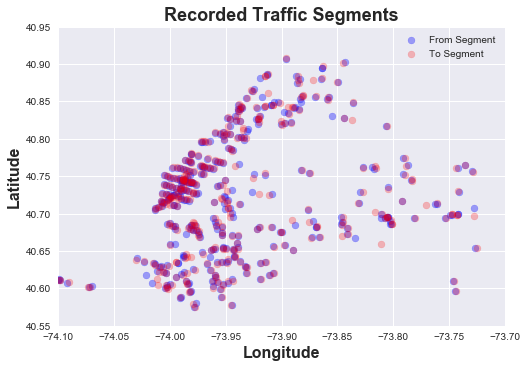

In [95]:
#Plot Total Traffic Pickup and Dropoff, not sure what to do with this

# Plot total pickup 
plt.scatter(trafficLongPick, trafficLatPick, c='blue',label = 'From Segment',alpha = .35)
#resize plot to fit data and ignore outliers
plt.axis([-74.1,-73.7,40.55,40.95])
plt.scatter(trafficLongDrop, trafficLatDrop,c = 'red',label = 'To Segment',alpha = .25)

#add labels for the scatter plot
plt.title('Recorded Traffic Segments', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=16, fontweight='bold')
plt.ylabel('Latitude', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', scatterpoints=1, frameon=False)


